In [1]:
import pandas as pd

# Load the dataset (assuming CSV format)
df = pd.read_csv('products_scraped.csv')
pd.set_option('display.max_colwidth', None)
df.head(4)

,Product Name,Barcode,Common Name,Packaging,Brands,Categories,Countries where sold,Nutri-Score,Nutri-Score Quality,NOVA Group,Food Processing,Eco-Score,Packaging Impact,Nutrient Levels,Ingredients,Additives,Ingredient Analysis
0,Redbull - Red Bull - 1,9.016260e+07,Energy Drink,"Can, Aluminium-can",Red Bull,"Beverages, Carbonated drinks, Sodas, Energy drinks, Sweetened beverages, Carbonated Sodas","Australia, Egypt, France, India, Ireland, Morocco, Tunisia, United Kingdom, United States",Nutri-Score E,Bad nutritional quality,NOVA 4,Ultra processed foods,Eco-Score not yet applicable,NaN,Fat in low quantity (0%); Sugars in high quantity (11%); Salt in moderate quantity (0.198%),"Carbonated Water, Sugar, Glucose, Citric Acid, Taurine, Natural flavors, Artificial Flavors, Sodium Bicarbonate, Magnesium Carbonate, Artificial Colors, Caffeine, Niacinamide, Pyridoxine Hci, Calcium Pantothenate, Vitamin B12.",E330 - Citric acid; E500 - Sodium carbonates; E500ii - Sodium hydrogen carbonate,Palm oil free; Vegan status unknown; Vegetarian status unknown
1,Tomato Ketchup - Heinz - 400 ml / 460 g,8.715725e+07,NaN,"Bottle, de:flasche(n)",Heinz,"Condiments, Sauces, Tomato sauces, Ketchup, Tomato Ketchup","Belgium, Estonia, France, Germany, India, Italy, Netherlands, New Caledonia, Portugal, Spain, Switzerland",Nutri-Score D,Poor nutritional quality,NOVA 3,Processed foods,Eco-Score B,NaN,Fat in low quantity (0.1%); Saturated fat in low quantity (0.1%); Sugars in high quantity (22.8%); Salt in high quantity (1.8%),"tomato (148 g per 100 g), vinegar, sugar, salt, extracts of spices and herbs (contains celery ), spice",NaN,Palm oil free; Vegan; Vegetarian
2,Diet coke - The Coca-Cola Company - 500 ml,5.449150e+07,NaN,"Plastic, Bottle or vial, Bottle, Pet-bottle, Pet-cap","The Coca-Cola Company, Coca-Cola, Diet Coke, Tiffin Sandwiches","Beverages, Carbonated drinks, Artificially sweetened beverages, Sodas, Diet beverages, Unsweetened beverages, Colas, Diet sodas, Diet cola soft drink, Sweetened beverages","France, India, United Kingdom",Nutri-Score B,Good nutritional quality,NOVA 4,Ultra processed foods,Eco-Score not yet applicable,NaN,Fat in low quantity (0%); Saturated fat in low quantity (0%); Sugars in low quantity (0%); Salt in low quantity (0%),"csd water, caramel color, aspartame, phosphoric acid, potassium benzoate (to protect taste), natural flavors, citric acid, caffeine, contains phenylalaline water gazeifiée, caramel colour e150d, sweeteners : aspartame, acesulfame k, flavourings, natural caffeine, phosphoric acid, citric acid",E150c - Ammonia caramel; E150d - Sulphite ammonia caramel; E212 - Potassium benzoate; E330 - Citric acid; E338 - Phosphoric acid; E950 - Acesulfame k; E951 - Aspartame,Palm oil free; Vegan status unknown; Vegetarian status unknown
3,Cassonade Saint Louis,2.112346e+12,NaN,NaN,NaN,NaN,India,Nutri-Score unknown,Missing data to compute the Nutri-Score,NOVA not computed,Food processing level unknown,Eco-Score not computed,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product Name          6075 non-null   object 
 1   Barcode               6070 non-null   float64
 2   Common Name           489 non-null    object 
 3   Packaging             189 non-null    object 
 4   Brands                3487 non-null   object 
 5   Categories            3104 non-null   object 
 6   Countries where sold  6075 non-null   object 
 7   Nutri-Score           6074 non-null   object 
 8   Nutri-Score Quality   6074 non-null   object 
 9   NOVA Group            5025 non-null   object 
 10  Food Processing       5025 non-null   object 
 11  Eco-Score             6075 non-null   object 
 12  Packaging Impact      0 non-null      float64
 13  Nutrient Levels       1311 non-null   object 
 14  Ingredients           1770 non-null   object 
 15  Additives            

In [3]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 295


In [4]:
# Remove duplicates
df = df.drop_duplicates()
print(f"Dataset Shape after removing duplicates: {df.shape}")

Dataset Shape after removing duplicates: (5805, 17)


In [5]:
# Drop columns with little or no meaningful data
df.drop(columns=['Packaging', 'Packaging Impact', 'Countries where sold'], inplace=True)

In [6]:
df.shape

(5805, 14)

In [7]:
# Retain rows with at least one critical field filled
df = df[df[['Ingredients', 'Additives', 'Ingredient Analysis']].notnull().any(axis=1)]

In [8]:
df.shape

(2123, 14)

In [9]:
# Fill missing values for less critical columns
df['Common Name'].fillna('Unknown', inplace=True)
df['Brands'].fillna('Unknown', inplace=True)
df['Categories'].fillna('Unknown', inplace=True)

# Verify missing values
print(df.isnull().sum())

Product Name              0
Barcode                   3
Common Name               0
Brands                    0
Categories                0
Nutri-Score               0
Nutri-Score Quality       0
NOVA Group               44
Food Processing          44
Eco-Score                 0
Nutrient Levels        1002
Ingredients             462
Additives              1236
Ingredient Analysis       5
dtype: int64


In [10]:
df['NOVA Group'].fillna(df['NOVA Group'].mode()[0], inplace=True)
df['Food Processing'].fillna(df['Food Processing'].mode()[0], inplace=True)

In [11]:
df['Barcode'].fillna(-1, inplace=True)

In [12]:
df['Nutrient Levels'].fillna('Not Available', inplace=True)

In [13]:
df['Ingredient Analysis'].fillna('Not Analyzed', inplace=True)

In [14]:
df = df[df['Ingredients'].notnull() | df['Additives'].notnull()]

In [15]:
# # Impute missing values in 'Additives' column with 'Unknown'
# df['Additives'].fillna('Unknown', inplace=True)

In [16]:
df.shape

(1661, 14)

In [17]:
# Verify missing values
print(df.isnull().sum())

Product Name             0
Barcode                  0
Common Name              0
Brands                   0
Categories               0
Nutri-Score              0
Nutri-Score Quality      0
NOVA Group               0
Food Processing          0
Eco-Score                0
Nutrient Levels          0
Ingredients              0
Additives              774
Ingredient Analysis      0
dtype: int64


In [18]:
# Clean and standardize 'Ingredients' column
df['Ingredients'] = df['Ingredients'].str.lower().str.replace(r"[^a-z, ]", "", regex=True).str.strip()

In [19]:
# Split 'Additives' into lists for better analysis
df['Additives'] = df['Additives'].str.lower().str.split(',')

In [20]:
df.head()

,Product Name,Barcode,Common Name,Brands,Categories,Nutri-Score,Nutri-Score Quality,NOVA Group,Food Processing,Eco-Score,Nutrient Levels,Ingredients,Additives,Ingredient Analysis
0,Redbull - Red Bull - 1,9.016260e+07,Energy Drink,Red Bull,"Beverages, Carbonated drinks, Sodas, Energy drinks, Sweetened beverages, Carbonated Sodas",Nutri-Score E,Bad nutritional quality,NOVA 4,Ultra processed foods,Eco-Score not yet applicable,Fat in low quantity (0%); Sugars in high quantity (11%); Salt in moderate quantity (0.198%),"carbonated water, sugar, glucose, citric acid, taurine, natural flavors, artificial flavors, sodium bicarbonate, magnesium carbonate, artificial colors, caffeine, niacinamide, pyridoxine hci, calcium pantothenate, vitamin b",[e330 - citric acid; e500 - sodium carbonates; e500ii - sodium hydrogen carbonate],Palm oil free; Vegan status unknown; Vegetarian status unknown
1,Tomato Ketchup - Heinz - 400 ml / 460 g,8.715725e+07,Unknown,Heinz,"Condiments, Sauces, Tomato sauces, Ketchup, Tomato Ketchup",Nutri-Score D,Poor nutritional quality,NOVA 3,Processed foods,Eco-Score B,Fat in low quantity (0.1%); Saturated fat in low quantity (0.1%); Sugars in high quantity (22.8%); Salt in high quantity (1.8%),"tomato g per g, vinegar, sugar, salt, extracts of spices and herbs contains celery , spice",NaN,Palm oil free; Vegan; Vegetarian
2,Diet coke - The Coca-Cola Company - 500 ml,5.449150e+07,Unknown,"The Coca-Cola Company, Coca-Cola, Diet Coke, Tiffin Sandwiches","Beverages, Carbonated drinks, Artificially sweetened beverages, Sodas, Diet beverages, Unsweetened beverages, Colas, Diet sodas, Diet cola soft drink, Sweetened beverages",Nutri-Score B,Good nutritional quality,NOVA 4,Ultra processed foods,Eco-Score not yet applicable,Fat in low quantity (0%); Saturated fat in low quantity (0%); Sugars in low quantity (0%); Salt in low quantity (0%),"csd water, caramel color, aspartame, phosphoric acid, potassium benzoate to protect taste, natural flavors, citric acid, caffeine, contains phenylalaline water gazeifie, caramel colour ed, sweeteners aspartame, acesulfame k, flavourings, natural caffeine, phosphoric acid, citric acid",[e150c - ammonia caramel; e150d - sulphite ammonia caramel; e212 - potassium benzoate; e330 - citric acid; e338 - phosphoric acid; e950 - acesulfame k; e951 - aspartame],Palm oil free; Vegan status unknown; Vegetarian status unknown
4,Corn Flakes - Kellogg's - 1.2 KG,8.901499e+12,Unknown,Kellogg's,"Plant-based foods and beverages, Plant-based foods, Breakfasts, Cereals and potatoes, Cereals and their products, Breakfast cereals, Flakes, Cereal flakes, Extruded cereals, Extruded flakes, Corn flakes",Nutri-Score unknown,Missing data to compute the Nutri-Score,NOVA 3,Processed foods,Eco-Score D,Not Available,"corn grits , sugar, cereal extract, lodized salt, vitamins, minerals and antioxidant ins contains gluten may contain traces of treenut",[e320 - butylated hydroxyanisole (bha)],Palm oil free; Vegan status unknown; Vegetarian status unknown
7,Dal makhani - Kohinoor - 300g,8.901048e+12,Unknown,Kohinoor,"Condiments, Meals, Sauces, Microwave meals, Curry sauces, Dal-makhani, Pre-cooked-dal-microwave-pouch",Nutri-Score B,Good nutritional quality,NOVA 3,Processed foods,Eco-Score B,Fat in moderate quantity (3.2%); Saturated fat in low quantity (0.5%); Sugars in low quantity (0.2%); Salt in moderate quantity (0.78%),"water, black gram lentils , tomato , red kidney beans , sunflower oil, garlic, salt, ginger , cumin powder, garam masala, red chilli powder, fenugreek leaves, cinnamon, cardamom, bay leaf, nutmeg powder, mace powder",NaN,Palm oil free; Vegan status unknown; Vegetarian status unknown


In [21]:
df.shape

(1661, 14)

In [22]:
# Save cleaned dataset
cleaned_file_path = "cleaned_products.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to cleaned_products.csv


In [23]:
df['NOVA_Group'] = df['NOVA Group'].str.extract('(\d+)').astype(float)

In [24]:
# def fill_nova(row):
#     if pd.isnull(row['NOVA_Group']):
#         if 'Ultra processed' in row['Food Processing']:
#             return 4
#         elif 'Processed' in row['Food Processing']:
#             return 3
#         else:
#             return 1  # Default to minimally processed
#     return row['NOVA_Group']

# df['NOVA_Group'] = df.apply(fill_nova, axis=1)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Nutri_Score_Quality'] = le.fit_transform(df['Nutri-Score Quality'])

In [26]:
# Example harmful additives list
harmful_additives = ['e102', 'e110', 'e122', 'e124', 'e211', 'e924', 'e443', 'e400', 'e250', 'e951', 
    'e320', 'e321', 'e330', 'e407', 'e466', 'e621', 'e627', 'e631', 'e950', 'e951', 
    'e952', 'e954', 'e133', 'e132', 'e143']  # Update with more additives

# Count the number of ingredients
df['Num_Ingredients'] = df['Ingredients'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Extract additives and split by semicolon
df['Additives'] = df['Additives'].apply(
    lambda x: [additive.split(' -')[0].strip() for additive in x[0].split(';')] if isinstance(x, list) else []
)

# Flag products with harmful additives
df['Contains_Harmful_Additives'] = df['Additives'].apply(
    lambda additives: any(additive in harmful_additives for additive in additives) if additives else False
)

# Count harmful additives per product
df['Harmful_Additive_Count'] = df['Additives'].apply(lambda x: sum(1 for additive in x if additive in harmful_additives))

# Preview new features
print(df[['Num_Ingredients', 'Harmful_Additive_Count', 'Contains_Harmful_Additives']].head())


   Num_Ingredients  Harmful_Additive_Count  Contains_Harmful_Additives
0               15                       1                        True
1                6                       0                       False
2               16                       3                        True
4                6                       1                        True
7               17                       0                       False


In [27]:
# Count the number of ingredients in each product
df['Ingredient_Complexity'] = df['Ingredients'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Preview results
print(df[['Ingredients', 'Ingredient_Complexity']].head())


                                                                                                                                                                                                                                                                                     Ingredients  \
0                                                                carbonated water, sugar, glucose, citric acid, taurine, natural flavors, artificial flavors, sodium bicarbonate, magnesium carbonate, artificial colors, caffeine, niacinamide, pyridoxine hci, calcium pantothenate, vitamin b   
1                                                                                                                                                                                                   tomato  g per  g, vinegar, sugar, salt, extracts of spices and herbs contains celery , spice   
2  csd water, caramel color, aspartame, phosphoric acid, potassium benzoate to protect taste, natural flavors, citric acid, 

In [28]:
# Example threshold values for concerns
# high_sugar_threshold = 5  # Example: 5g per 100g is high for diabetes
# high_salt_threshold = 0.5  # Example: 0.5g per 100g is high for BP patients

# Create flags based on Nutrient Levels
# df['High_Sugar'] = df['Nutrient Levels'].apply(lambda x: 'Sugars in high quantity' in x if isinstance(x, str) else False)
# df['High_Salt'] = df['Nutrient Levels'].apply(lambda x: 'Salt in high quantity' in x if isinstance(x, str) else False)

# Preview results
# print(df[['Nutrient Levels', 'High_Sugar', 'High_Salt']].head())


                                                                                                                           Nutrient Levels  \
0                                              Fat in low quantity (0%); Sugars in high quantity (11%); Salt in moderate quantity (0.198%)   
1          Fat in low quantity (0.1%); Saturated fat in low quantity (0.1%); Sugars in high quantity (22.8%); Salt in high quantity (1.8%)   
2                     Fat in low quantity (0%); Saturated fat in low quantity (0%); Sugars in low quantity (0%); Salt in low quantity (0%)   
4                                                                                                                            Not Available   
7  Fat in moderate quantity (3.2%); Saturated fat in low quantity (0.5%); Sugars in low quantity (0.2%); Salt in moderate quantity (0.78%)   

   High_Sugar  High_Salt  
0        True      False  
1        True       True  
2       False      False  
4       False      False  
7       Fals

In [29]:
# Assign risk scores based on health concerns and processing level
def calculate_risk(row):
    score = 0
    
    # Additive Risk (More harmful additives = Higher risk)
    score += row['Harmful_Additive_Count'] * 2  

    # Ingredient Complexity (More ingredients = Higher risk)
    score += row['Ingredient_Complexity'] * 0.5  

    # # Processing Risk (Higher NOVA Group = Higher risk)
    # score += row['NOVA_Group'] * 2  

    # # Nutrition Risk (Worse Nutri-Score Quality = Higher risk)
    # score += row['Nutri_Score_Quality'] * 3  
    
    # # Processing Risk
    # if "Ultra processed" in row['Food Processing']:
    #     score += 5  

    # Nutrition Risk
    if row['High_Sugar']:
        score += 3  
    if row['High_Salt']:
        score += 2  

    return score

# Apply function to calculate risk scores# Define threshold for health concerns (per 100g, since no serving size)
high_sugar_threshold = 5  # grams of sugar per 100g
high_salt_threshold = 0.5  # grams of salt per 100g

# Update health-specific flags based on Nutrient Levels
df['High_Sugar'] = df['Nutrient Levels'].apply(lambda x: 'Sugars in high quantity' in x if isinstance(x, str) else False)
df['High_Salt'] = df['Nutrient Levels'].apply(lambda x: 'Salt in high quantity' in x if isinstance(x, str) else False)

# Now you can calculate risk based on these flags
def calculate_risk(row):
    score = 0
    
    # Additive Risk
    score += row['Harmful_Additive_Count'] * 2  

    # Ingredient Complexity
    score += row['Ingredient_Complexity'] * 0.5  

    # Processing Risk
    if "Ultra processed" in row['Food Processing']:
        score += 5  

    # Nutrition Risk
    if row['High_Sugar']:
        score += 3  
    if row['High_Salt']:
        score += 2  

    return score

# Apply the function
df['Risk_Score'] = df.apply(calculate_risk, axis=1)

# Preview
print(df[['High_Sugar', 'High_Salt', 'Risk_Score']].head())

df['Risk_Score'] = df.apply(calculate_risk, axis=1)

# Preview results
print(df[['Harmful_Additive_Count', 'Ingredient_Complexity', 'Risk_Score']].head())


   High_Sugar  High_Salt  Risk_Score
0        True      False        17.5
1        True       True         8.0
2       False      False        19.0
4       False      False         5.0
7       False      False         8.5
   Harmful_Additive_Count  Ingredient_Complexity  Risk_Score
0                       1                     15        17.5
1                       0                      6         8.0
2                       3                     16        19.0
4                       1                      6         5.0
7                       0                     17         8.5


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


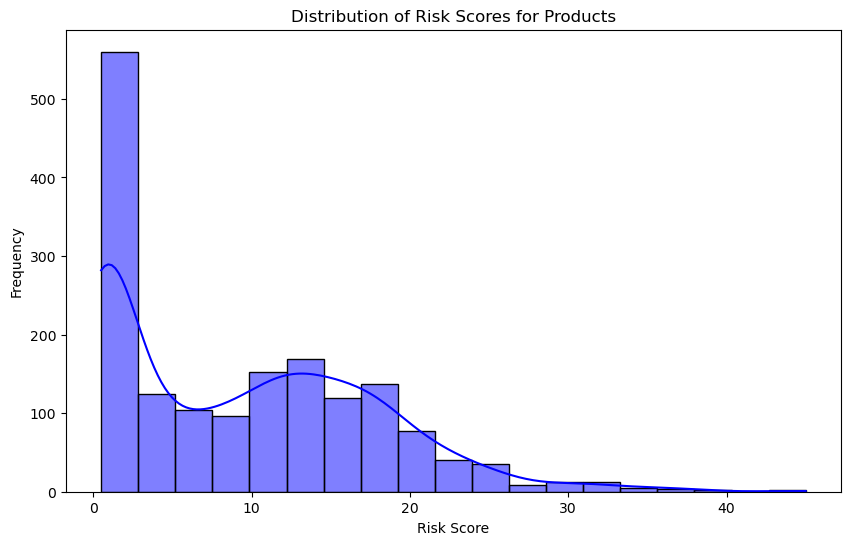

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of risk scores
plt.figure(figsize=(10,6))
sns.histplot(df['Risk_Score'], kde=True, color='blue')
plt.title('Distribution of Risk Scores for Products')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()


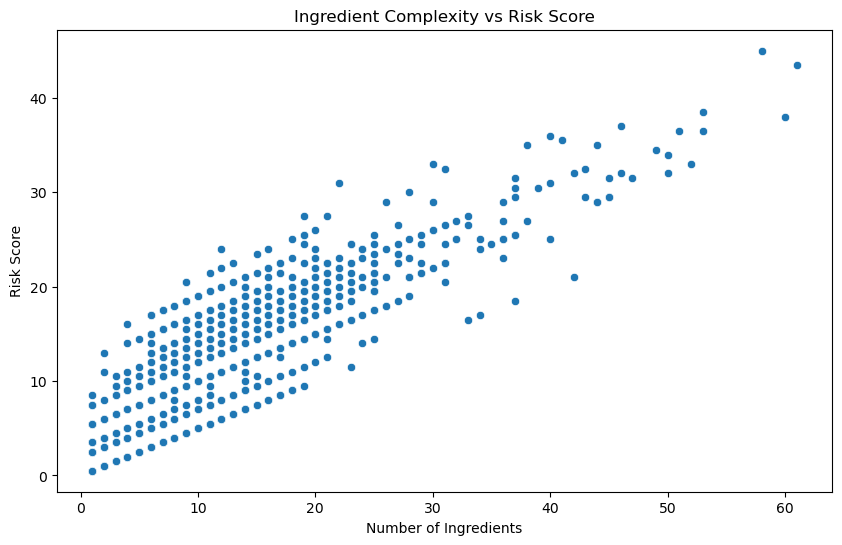

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ingredient_Complexity', y='Risk_Score', data=df)
plt.title('Ingredient Complexity vs Risk Score')
plt.xlabel('Number of Ingredients')
plt.ylabel('Risk Score')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


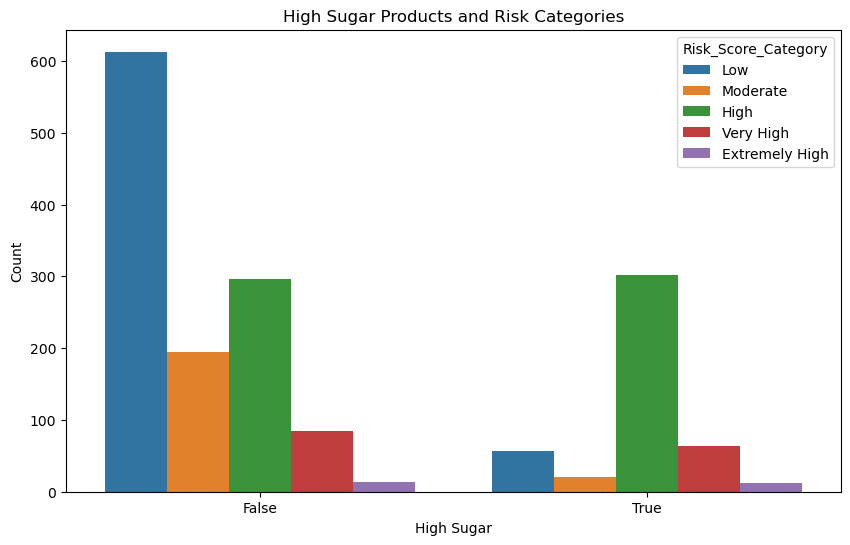

In [32]:
# Binning Risk_Score into categories
# Define better bins for Risk_Score
bins = [0, 5, 10, 20, 30, 40]  # Adjust as needed for your dataset
labels = ['Low', 'Moderate', 'High', 'Very High', 'Extremely High']  # Customize these labels

# Apply binning to Risk_Score
df['Risk_Score_Category'] = pd.cut(df['Risk_Score'], bins=bins, labels=labels, right=False)

# Ensure all categories are assigned
# print(df[['Risk_Score', 'Risk_Score_Category']].head())


# Ensure High_Sugar is boolean or categorical
df['High_Sugar'] = df['High_Sugar'].astype('category')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='High_Sugar', hue='Risk_Score_Category', data=df)

plt.title('High Sugar Products and Risk Categories')
plt.xlabel('High Sugar')
plt.ylabel('Count')
plt.show()


In [33]:
print(df[['High_Sugar', 'Risk_Score', 'Risk_Score_Category']].head())
print(df.dtypes[['High_Sugar', 'Risk_Score_Category']])
df.head()

  High_Sugar  Risk_Score Risk_Score_Category
0       True        17.5                High
1       True         8.0            Moderate
2      False        19.0                High
4      False         5.0            Moderate
7      False         8.5            Moderate
High_Sugar             category
Risk_Score_Category    category
dtype: object


,Product Name,Barcode,Common Name,Brands,Categories,Nutri-Score,Nutri-Score Quality,NOVA Group,Food Processing,Eco-Score,...,NOVA_Group,Nutri_Score_Quality,Num_Ingredients,Contains_Harmful_Additives,Harmful_Additive_Count,Ingredient_Complexity,High_Sugar,High_Salt,Risk_Score,Risk_Score_Category
0,Redbull - Red Bull - 1,9.016260e+07,Energy Drink,Red Bull,"Beverages, Carbonated drinks, Sodas, Energy drinks, Sweetened beverages, Carbonated Sodas",Nutri-Score E,Bad nutritional quality,NOVA 4,Ultra processed foods,Eco-Score not yet applicable,...,4.0,1,15,True,1,15,True,False,17.5,High
1,Tomato Ketchup - Heinz - 400 ml / 460 g,8.715725e+07,Unknown,Heinz,"Condiments, Sauces, Tomato sauces, Ketchup, Tomato Ketchup",Nutri-Score D,Poor nutritional quality,NOVA 3,Processed foods,Eco-Score B,...,3.0,5,6,False,0,6,True,True,8.0,Moderate
2,Diet coke - The Coca-Cola Company - 500 ml,5.449150e+07,Unknown,"The Coca-Cola Company, Coca-Cola, Diet Coke, Tiffin Sandwiches","Beverages, Carbonated drinks, Artificially sweetened beverages, Sodas, Diet beverages, Unsweetened beverages, Colas, Diet sodas, Diet cola soft drink, Sweetened beverages",Nutri-Score B,Good nutritional quality,NOVA 4,Ultra processed foods,Eco-Score not yet applicable,...,4.0,2,16,True,3,16,False,False,19.0,High
4,Corn Flakes - Kellogg's - 1.2 KG,8.901499e+12,Unknown,Kellogg's,"Plant-based foods and beverages, Plant-based foods, Breakfasts, Cereals and potatoes, Cereals and their products, Breakfast cereals, Flakes, Cereal flakes, Extruded cereals, Extruded flakes, Corn flakes",Nutri-Score unknown,Missing data to compute the Nutri-Score,NOVA 3,Processed foods,Eco-Score D,...,3.0,3,6,True,1,6,False,False,5.0,Moderate
7,Dal makhani - Kohinoor - 300g,8.901048e+12,Unknown,Kohinoor,"Condiments, Meals, Sauces, Microwave meals, Curry sauces, Dal-makhani, Pre-cooked-dal-microwave-pouch",Nutri-Score B,Good nutritional quality,NOVA 3,Processed foods,Eco-Score B,...,3.0,2,17,False,0,17,False,False,8.5,Moderate


In [34]:
def categorize_risk(score):
    if score < 5:
        return "Low"
    elif score < 10:
        return "Medium"
    else:
        return "High"

df['Risk_Score_Category'] = df['Risk_Score'].apply(categorize_risk)

In [35]:
df['Risk_Score_Category'].value_counts()

Risk_Score_Category
High      776
Low       670
Medium    215
Name: count, dtype: int64

In [36]:
additive_explanations = {
    'e102': 'E102 (Tartrazine): Yellow dye linked to hyperactivity and allergic reactions.',
    'e110': 'E110 (Sunset Yellow): Yellow dye linked to hyperactivity and asthma.',
    'e122': 'E122 (Azorubine): Red dye linked to hyperactivity in children.',
    'e124': 'E124 (Ponceau 4R): Red dye associated with allergic reactions.',
    'e211': 'E211 (Sodium benzoate): Preservative linked to hyperactivity in children.',
    'e924': 'E924 (Potassium bromate): Flour improver linked to cancer risks.',
    'e443': 'E443 (Ammonium phosphatide): Used as an emulsifier, can cause allergic reactions.',
    'e400': 'E400 (Alginic acid): A stabilizer and thickening agent, safe for most people.',
    'e250': 'E250 (Sodium nitrite): Preservative, linked to cancer risk in high doses.',
    'e951': 'E951 (Aspartame): Artificial sweetener, can cause headaches in some people.',
    'e320': 'E320 (Butylated hydroxyanisole): Preservative, linked to cancer risks.',
    'e321': 'E321 (Butylated hydroxytoluene): Preservative, possible health risks when consumed in high quantities.',
    'e330': 'E330 (Citric acid): Naturally occurring acid, safe for consumption.',
    'e407': 'E407 (Carrageenan): Used as a thickener, can cause digestive issues in sensitive individuals.',
    'e466': 'E466 (Carboxymethyl cellulose): Thickener, can cause digestive problems.',
    'e621': 'E621 (Monosodium glutamate, MSG): Flavor enhancer linked to headaches in sensitive individuals.',
    'e627': 'E627 (Disodium guanylate): Flavor enhancer, can cause headaches in some people.',
    'e631': 'E631 (Disodium inosinate): Flavor enhancer, can cause allergic reactions in sensitive individuals.',
    'e950': 'E950 (Acesulfame K): Artificial sweetener, generally considered safe but linked to cancer risk in large doses.',
    'e951': 'E951 (Aspartame): Artificial sweetener, can cause headaches in some people.',
    'e952': 'E952 (Cyclamate): Artificial sweetener banned in some countries due to potential carcinogenic effects.',
    'e954': 'E954 (Saccharin): Artificial sweetener linked to cancer risk.',
    'e133': 'E133 (Brilliant Blue FCF): Artificial blue dye, can cause allergic reactions.',
    'e132': 'E132 (Indigotine): Artificial blue dye, linked to allergic reactions in some individuals.',
    'e143': 'E143 (Green S): Green dye, potentially harmful to sensitive individuals.'
}


In [37]:
df['Additives']

0                               [e330, e500, e500ii]
1                                                 []
2       [e150c, e150d, e212, e330, e338, e950, e951]
4                                             [e320]
7                                                 []
                            ...                     
6042                                              []
6043                                   [e150d, e322]
6045                                              []
6047                                              []
6048                      [e304, e304ii, e471, e960]
Name: Additives, Length: 1661, dtype: object

In [38]:
# Function to map explanations
def get_additive_explanations(additives_list):
    return [additive_explanations[add] for add in additives_list if add in additive_explanations]

# Apply it to the column
df['Additive_Explanations'] = df['Additives'].apply(get_additive_explanations)

# Show the explanation for the first few products
df[['Product Name', 'Additive_Explanations']].head()


,Product Name,Additive_Explanations
0,Redbull - Red Bull - 1,"[E330 (Citric acid): Naturally occurring acid, safe for consumption.]"
1,Tomato Ketchup - Heinz - 400 ml / 460 g,[]
2,Diet coke - The Coca-Cola Company - 500 ml,"[E330 (Citric acid): Naturally occurring acid, safe for consumption., E950 (Acesulfame K): Artificial sweetener, generally considered safe but linked to cancer risk in large doses., E951 (Aspartame): Artificial sweetener, can cause headaches in some people.]"
4,Corn Flakes - Kellogg's - 1.2 KG,"[E320 (Butylated hydroxyanisole): Preservative, linked to cancer risks.]"
7,Dal makhani - Kohinoor - 300g,[]


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[[ 'High_Salt', 'Ingredient_Complexity','High_Sugar', 'Harmful_Additive_Count']] = scaler.fit_transform(
    df[[ 'High_Salt', 'Ingredient_Complexity','High_Sugar', 'Harmful_Additive_Count']]
)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Select Features & Target
# X = df[['Harmful_Additive_Count', 'Num_Ingredients', 'Ingredient_Complexity', 'High_Sugar', 'High_Salt']]
X = df[['Harmful_Additive_Count', 'High_Sugar','Ingredient_Complexity', 'High_Salt']]
y = df['Risk_Score_Category']

# Convert target to numerical labels
y = y.map({'Low': 0, 'Medium': 1, 'High': 2})

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from xgboost import XGBClassifier
# Convert categorical columns to numerical (0/1)
categorical_cols = ['High_Sugar', 'High_Salt']  # Add any other categorical columns

for col in categorical_cols:
    df[col] = df[col].astype(int)

scale_pos_weight = len(y_train) / (3 * np.bincount(y_train))
xgb_params = {
   "n_estimators": 300,
    "max_depth": 6,
    "learning_rate": 0.1,
    "gamma": 0.2,
    "min_child_weight": 5,  # Helps prevent overfitting
}


xgb_model = XGBClassifier(xgb_params)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


Accuracy: 0.8948948948948949
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       138
           1       0.59      0.28      0.38        36
           2       0.91      0.97      0.94       159

    accuracy                           0.89       333
   macro avg       0.80      0.74      0.75       333
weighted avg       0.88      0.89      0.88       333



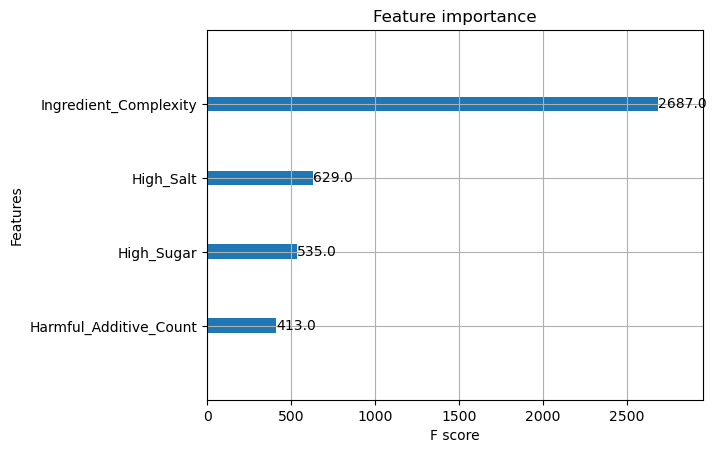

In [42]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

In [43]:

# Train Model
# clf = RandomForestClassifier(n_estimators=200, 
#                                max_depth=None, 
#                                min_samples_split=10, 
#                                class_weight='balanced',  # Adjusts for class imbalance
#                                random_state=42)
# clf.fit(X_train, y_train)

# # Evaluate
# y_pred = clf.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [44]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Define your feature matrix X and target y (numeric 0,1,2 for Low/Medium/High)
X = df[['Harmful_Additive_Count', 'High_Sugar','Ingredient_Complexity', 'High_Salt']]
y = df['Risk_Score_Category'].map({'Low':0,'Medium':1,'High':2})

# Scorers for multiclass (macro-averaged)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

for folds in (5, 10):
    cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    scores = cross_validate(xgb_model, X, y, cv=cv, scoring=scoring)
    print(f"\n{folds}-Fold CV:")
    print(f" Accuracy: {scores['test_accuracy'].mean():.3f} ± {scores['test_accuracy'].std():.3f}")
    print(f" Precision (macro): {scores['test_precision'].mean():.3f} ± {scores['test_precision'].std():.3f}")
    print(f" Recall (macro):    {scores['test_recall'].mean():.3f} ± {scores['test_recall'].std():.3f}")



5-Fold CV:
 Accuracy: 0.876 ± 0.010
 Precision (macro): 0.783 ± 0.026
 Recall (macro):    0.751 ± 0.034

10-Fold CV:
 Accuracy: 0.876 ± 0.018
 Precision (macro): 0.783 ± 0.050
 Recall (macro):    0.750 ± 0.040


In [45]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Assuming X_test, y_test, y_pred already exist
# cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low','Medium','High'])
# disp.plot(cmap='Blues')
# plt.title("Hold‑out Confusion Matrix")
# plt.show()

# # Inspect mis‑labeled Medium cases
# mis_medium = X_test[(y_test == 1) & (y_pred != 1)]
# print("Examples of true Medium labeled as", 
#       ["Low" if p==0 else "High" for p in y_pred[(y_test==1)&(y_pred!=1)]])


In [47]:
import joblib
joblib.dump(xgb_model, 'risk_predictor_model.pkl')

['risk_predictor_model.pkl']

In [48]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [50]:
import joblib

joblib.dump(additive_explanations, 'additive_expl_dict.pkl')

['additive_expl_dict.pkl']